In [2]:
import os
import numpy as np
from DataLoader3 import load_images_from_selected_classes

# Define the classes you want to sample images from
selected_classes = ['Apple Braeburn', 'Banana', 'Lemon', 'Limes']

# Path to the folder containing the images
base_folder_path = "C:/Users/aemsh/Desktop/DATA4380/ComputerVision/fruits-360_dataset/fruits-360/Training"

# Load and resize images from selected classes
loaded_images_dict = load_images_from_selected_classes(selected_classes, base_folder_path)

# Convert the loaded images per class into an array list
images_array_dict = {}
for class_name, images in loaded_images_dict.items():
    images_array_dict[class_name] = np.array(images)

# Now you can access any desired image from a desired class
desired_class_name = 'Banana'
desired_image_index = 9  # Index starts from 0, so 9 means the 10th image
desired_image = images_array_dict[desired_class_name][desired_image_index]


In [3]:
images_array_dict

{'Apple Braeburn': array([[[[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
 
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
 
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
 
         ...,
 
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
 
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
 
         [[255, 255, 255],
          [255, 255, 255],
          [2

In [3]:
desired_image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Concatenate all images and labels into arrays
X = []
y = []
for class_name, images_array in images_array_dict.items():
    X.extend(images_array)
    y.extend([class_name] * len(images_array))

X = np.array(X)
y = np.array(y)

# Encode class labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert class labels to one-hot encoding
y_onehot = to_categorical(y_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Define the model architecture
model = Sequential([
    Flatten(input_shape=(X_train.shape[1:])),  # Flatten the input images
    Dense(256, activation='relu'),
    Dense(len(selected_classes), activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


Epoch 1/10



8/8 [==============================] - 5s 470ms/step - loss: 43807.5078 - accuracy: 0.3125 - val_loss: 21104.5156 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 3s 409ms/step - loss: 6193.3477 - accuracy: 0.6680 - val_loss: 3542.9714 - val_accuracy: 0.7656
Epoch 3/10
8/8 [==============================] - 3s 406ms/step - loss: 2271.7002 - accuracy: 0.7930 - val_loss: 27.5407 - val_accuracy: 0.9531
Epoch 4/10
8/8 [==============================] - 3s 409ms/step - loss: 615.6990 - accuracy: 0.9180 - val_loss: 1088.7535 - val_accuracy: 0.7812
Epoch 5/10
8/8 [==============================] - 3s 407ms/step - loss: 195.3726 - accuracy: 0.9219 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
8/8 [==============================] - 3s 408ms/step - loss: 69.3097 - accuracy: 0.9805 - val_loss: 21.2371 - val_accuracy: 0.9844
Epoch 7/10
8/8 [==============================] - 3s 409ms/step - loss: 8.8944 - accuracy: 0.9922 - val_loss: 0.0000e+00 - val_accuracy: 1.0

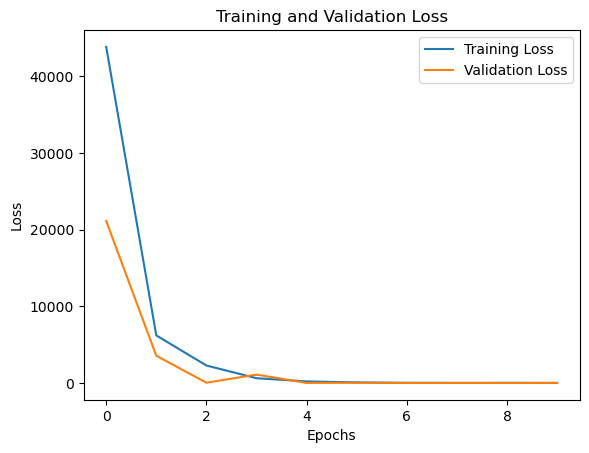

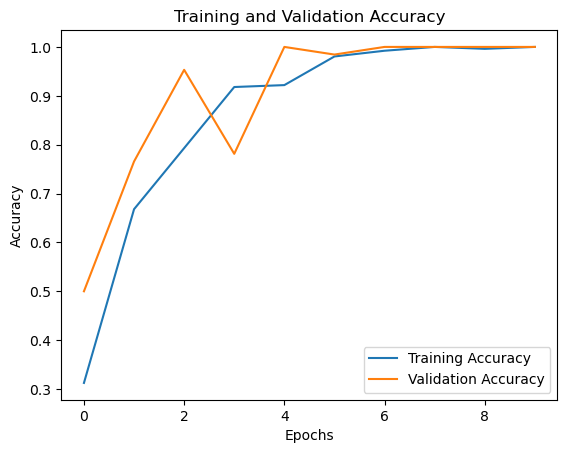

In [5]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [11]:
import tensorflow as tf

# Save the model
model.save("my_model")

# Load the model
reconstructed_model = tf.keras.models.load_model("my_model")

# Use tf.io.gfile.exists instead of tf.gfile.Exists
if tf.io.gfile.exists("my_model"):
    print("Model directory exists")
else:
    print("Model directory does not exist")

INFO:tensorflow:Assets written to: my_model\assets


INFO:tensorflow:Assets written to: my_model\assets


Model directory exists
